# Deep Learning Aproach For Safty Roads

## Yahia Chammami

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from sklearn.model_selection import train_test_split
from collections import Counter
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import array_to_img, ImageDataGenerator, img_to_array, load_img
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


####

### Acess To Data and Load it

In [5]:
def load_images(path, image_size):
    input_image = [] # Initialize an empty list to store image arrays and labels
    cate = ['Vechicles','NO_Vehicles']   # Define the categories (class labels)

    for i in cate:   # Loop over each category
        folders = os.path.join(path, i)   # Create the path to the subdirectory for the current category
        label = cate.index(i)    # Assign a label (0 for 'Vehicles', 1 for 'NO_Vehicles')
        
        for image in os.listdir(folders):   # Loop over each image file in the subdirectory
            image_path = os.path.join(folders, image)   # Construct the full path to the current image
            image_array = cv2.imread(image_path)   # Read the image using OpenCV

            # Check if the image is successfully loaded
            if image_array is not None:
                image_array = cv2.resize(image_array, (image_size, image_size)) 
                input_image.append([image_array, label])

    return input_image


In [12]:
path_to_data = r"C:\Users\yahya\Desktop\CNN\Nouveau dossier\Data" 
data = load_images(path_to_data,image_size=100)

### Display Image

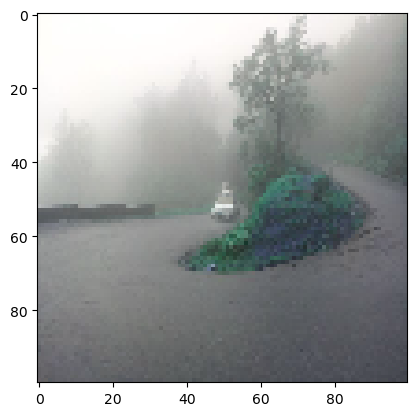

In [13]:
# Assuming `data` contains the loaded images
image_array = data[0][0]

# Display the image
plt.imshow(image_array)
plt.show()

### Splitting Data

In [14]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [15]:
# Separate the features (X) and labels (y) for training and testing sets
X_train, y_train = np.array([item[0] for item in train_data]), np.array([item[1] for item in train_data])
X_test, y_test = np.array([item[0] for item in test_data]), np.array([item[1] for item in test_data])

### Preprocessing

In [16]:
# Data augmentation for the training set using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, #normalization
                                        rotation_range=40, 
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)


In [17]:
# Normalize pixel values in the test set using the same normalization factor
X_test_normalized = X_test / 255.0

### Model Creation 

In [18]:
# Define your CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  

In [19]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Fit the model using the augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=9,
                    validation_data=(X_test_normalized, y_test))

Epoch 1/9
15/15 [==============================] - 1s 92ms/step - loss: 0.4294 - accuracy: 0.7780 - val_loss: 0.4971 - val_accuracy: 0.7563
Epoch 2/9
15/15 [==============================] - 1s 88ms/step - loss: 0.4021 - accuracy: 0.8245 - val_loss: 0.3865 - val_accuracy: 0.8151
Epoch 3/9
15/15 [==============================] - 1s 94ms/step - loss: 0.4201 - accuracy: 0.8097 - val_loss: 0.7539 - val_accuracy: 0.6807
Epoch 4/9
15/15 [==============================] - 1s 89ms/step - loss: 0.4200 - accuracy: 0.7970 - val_loss: 0.3796 - val_accuracy: 0.8319
Epoch 5/9
15/15 [==============================] - 1s 92ms/step - loss: 0.3634 - accuracy: 0.8372 - val_loss: 0.4323 - val_accuracy: 0.8235
Epoch 6/9
15/15 [==============================] - 1s 93ms/step - loss: 0.3456 - accuracy: 0.8288 - val_loss: 0.4827 - val_accuracy: 0.7563
Epoch 7/9
15/15 [==============================] - 1s 87ms/step - loss: 0.3210 - accuracy: 0.8457 - val_loss: 0.4331 - val_accuracy: 0.8067
Epoch 8/9
15/15 [===

### Model Evaluation 

In [23]:
# Function to plot loss curves
def plot_curves(history):
    import matplotlib.pyplot as plt
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


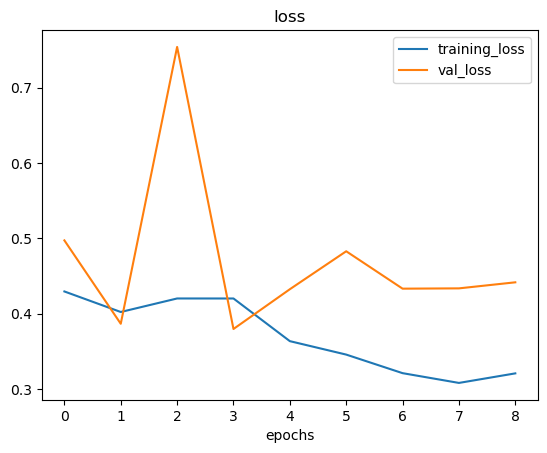

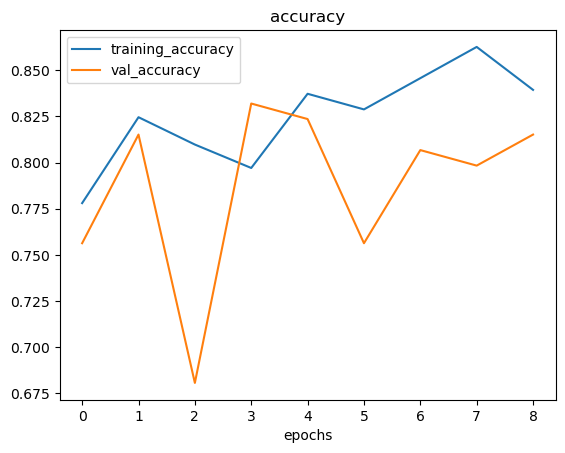

In [24]:
plot_curves(history)

### Testing the prediction

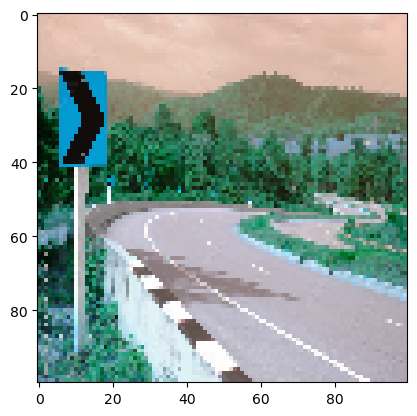

In [26]:
# Assuming `data` contains the loaded images
image_array = data[380][0]

# Display the image
plt.imshow(image_array)
plt.show()

In [27]:

image_size = 100  # Replace with the actual size used during training
normalized_image = cv2.resize(image_array, (image_size, image_size)) / 255.0

# Reshape the image to match the model's input shape
input_image = np.expand_dims(normalized_image, axis=0)

# Predict the class
predictions = model.predict(input_image)

# Assuming binary classification (0 or 1)
predicted_class = "NO_Vehicles" if predictions[0, 0] > 0.5 else "Vehicles"

print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 88ms/step
Predicted Class: NO_Vehicles


NO_Vehicles